# RAPID Lidar Data 

### Notebook contents 
Opening the raster data tifs for the first time\
Processing the point clouds in Cloud Compare, and created differences (i.e., HS, CHM) in ArcGIS Pro\
but need to do the differencing here because something was going on with gridding in ArcGIS Pro

* looking at the different DTMs 
* creating snow depth from them all and comparing 
* creating chmws from DSM and DTM, to check the differencing again

created by Cassie Lumbrazo\
date: October 2023\
python environment: **raster**

In [2]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
import rasterio
# import rasterstats
import scipy

In [3]:
pwd

'/home/lumbraca/raster/python/RAPID_raster_analysis'

In [4]:
# Results from model simulations, reproject match everything to this raster
## Paths to the linux box  
# Checking dtms from all three sets (different ground point classifications from point cloud)
tif_chm_rapid_set1 = rioxarray.open_rasterio("/storage/lumbraca/RAPID/set1/chm_rapid_clean_1.tif", masked=True)

# should be able to import the entire domain for FL, then when I reproject_match, it clips to the extent of the snow depth 
# snow off and ncalm datasets
tif_dtm_snowoff = rioxarray.open_rasterio("/storage/lumbraca/RAPID/cer_dtm_snowoff_m.tif", masked=True)
tif_dsm_snowoff = rioxarray.open_rasterio("/storage/lumbraca/RAPID/cer_dsm_snowoff_m.tif", masked=True)
tif_dtm_ncalm = rioxarray.open_rasterio("/storage/lumbraca/RAPID/ncalm_dtm.tif", masked=True)
tif_dsm_ncalm = rioxarray.open_rasterio("/storage/lumbraca/RAPID/ncalm_dsm.tif", masked=True)

# rapid data, different ways the ground points were processed 
tif_dtm_rapid_set1 = rioxarray.open_rasterio("/storage/lumbraca/RAPID/set1/rapid_dtm_minreturn_cloudcompare.tif", masked=True)
tif_dsm_rapid_set1 = rioxarray.open_rasterio("/storage/lumbraca/RAPID/set1/rapid_dsm_cloudcompare.tif", masked=True)

tif_dtm_rapid_set2 = rioxarray.open_rasterio("/storage/lumbraca/RAPID/set2/rapid_dtm_set2.tif", masked=True)
tif_dtm_rapid_set3 = rioxarray.open_rasterio("/storage/lumbraca/RAPID/set3/rapid_dtm_set3.tif", masked=True)

# Put it all together 
ds = xr.Dataset({"chm_rapid_set1":tif_chm_rapid_set1,
                 "dtm_snowoff":tif_dtm_snowoff.rio.reproject_match(tif_chm_rapid_set1, resampling = rasterio.enums.Resampling.bilinear),
                 "dsm_snowoff":tif_dsm_snowoff.rio.reproject_match(tif_chm_rapid_set1, resampling = rasterio.enums.Resampling.bilinear),
                 "dtm_ncalm":tif_dtm_ncalm.rio.reproject_match(tif_chm_rapid_set1, resampling = rasterio.enums.Resampling.bilinear),
                 "dsm_ncalm":tif_dsm_ncalm.rio.reproject_match(tif_chm_rapid_set1, resampling = rasterio.enums.Resampling.bilinear),
                 "dtm_rapid_set1":tif_dtm_rapid_set1.rio.reproject_match(tif_chm_rapid_set1, resampling = rasterio.enums.Resampling.bilinear),
                 "dsm_rapid_set1":tif_dsm_rapid_set1.rio.reproject_match(tif_chm_rapid_set1, resampling = rasterio.enums.Resampling.bilinear),
                 "dtm_rapid_set2":tif_dtm_rapid_set2.rio.reproject_match(tif_chm_rapid_set1, resampling = rasterio.enums.Resampling.bilinear),
                 "dtm_rapid_set3":tif_dtm_rapid_set3.rio.reproject_match(tif_chm_rapid_set1, resampling = rasterio.enums.Resampling.bilinear),})



# for later.................. once I have everything to add to the dataframe
# simple calculations
# tif_aspect = rioxarray.open_rasterio("/storage/lumbraca/NCALM_sites/cer/cer_aspect.tif", masked=True)
# tif_slope = rioxarray.open_rasterio("/storage/lumbraca/NCALM_sites/cer/cer_slope.tif", masked=True)

# tif_chm_snowoff = rioxarray.open_rasterio("/storage/lumbraca/NCALM_sites/cer/cer_chm_snowoff.tif", masked=True)
# tif_chmws = rioxarray.open_rasterio("/storage/lumbraca/NCALM_sites/cer/cer_chmws.tif", masked=True)
# tif_chmas = rioxarray.open_rasterio("/storage/lumbraca/NCALM_sites/cer/cer_chmas.tif", masked=True)

# tif_dce = rioxarray.open_rasterio("/storage/lumbraca/NCALM_sites/cer/cer_dce.tif", masked=True)
# tif_dah = rioxarray.open_rasterio("/storage/lumbraca/NCALM_sites/cer/cer_dah.tif", masked=True)
# tif_tpi = rioxarray.open_rasterio("/storage/lumbraca/NCALM_sites/cer/cer_tpi.tif", masked=True)


# # Put it all together 
# ds = xr.Dataset({"snowdepth":tif_snowdepth,
#                  "dtm_snowoff":tif_dtm_snowoff.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "dsm_snowoff":tif_dsm_snowoff.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "dtm_ncalm":tif_ncalm_dtm_snowon.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "dsm_ncalm":tif_ncalm_dsm_snowon.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "aspect":tif_aspect.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "slope":tif_slope.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "chm_snowoff":tif_chm_snowoff.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "chmws":tif_chmws.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "chmas":tif_chmas.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "dce":tif_dce.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "tpi":tif_tpi.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "dah":tif_dah.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear)})

In [5]:
# close all the datasets to save memory 
tif_dtm_snowoff.close()
tif_dsm_snowoff.close()
tif_dtm_ncalm.close()
tif_dsm_ncalm.close()

tif_dtm_rapid_set1.close()
tif_dsm_rapid_set1.close()
tif_dtm_rapid_set2.close()

tif_chm_rapid_set1.close()

In [6]:
ds

<xarray.Dataset>
Dimensions:         (band: 1, x: 2564, y: 1388)
Coordinates:
  * band            (band) int64 1
  * x               (x) float64 4.65e+05 4.65e+05 ... 4.676e+05 4.676e+05
  * y               (y) float64 2.111e+05 2.111e+05 ... 2.097e+05 2.097e+05
    spatial_ref     int64 0
Data variables:
    chm_rapid_set1  (band, y, x) float32 ...
    dtm_snowoff     (band, y, x) float32 1.031e+03 1.031e+03 ... 883.7 883.5
    dsm_snowoff     (band, y, x) float32 1.047e+03 1.049e+03 ... 904.0 905.1
    dtm_ncalm       (band, y, x) float32 3.381e+03 3.382e+03 ... 2.898e+03
    dsm_ncalm       (band, y, x) float32 3.424e+03 3.437e+03 ... 2.963e+03
    dtm_rapid_set1  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    dsm_rapid_set1  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    dtm_rapid_set2  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    dtm_rapid_set3  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan

In [7]:
# Because this takes so long to create, let's save all the raw files into a netcdf, before cleaning up the dataset and resaving 
# ds.to_netcdf('/home/lumbraca/raster/data/cer_rapid_rawdata_create_netcdf.nc')

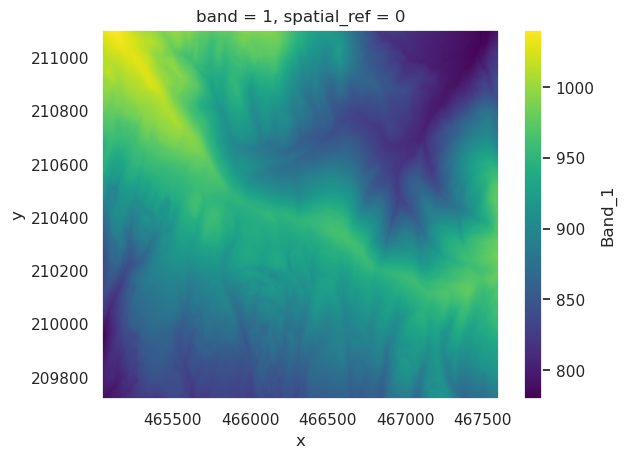

In [8]:
ds.dtm_snowoff.plot()

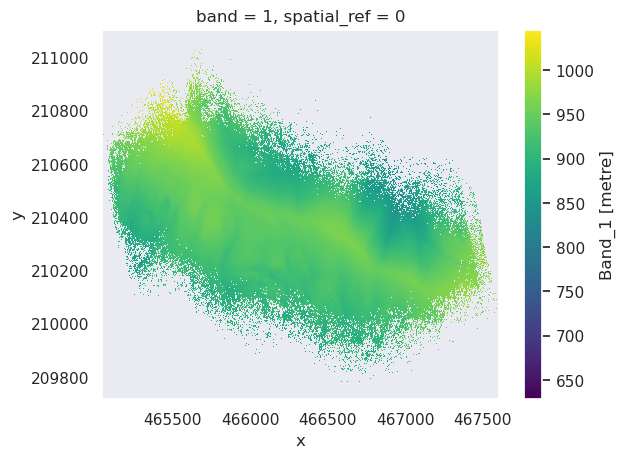

In [9]:
ds.dtm_rapid_set1.plot()

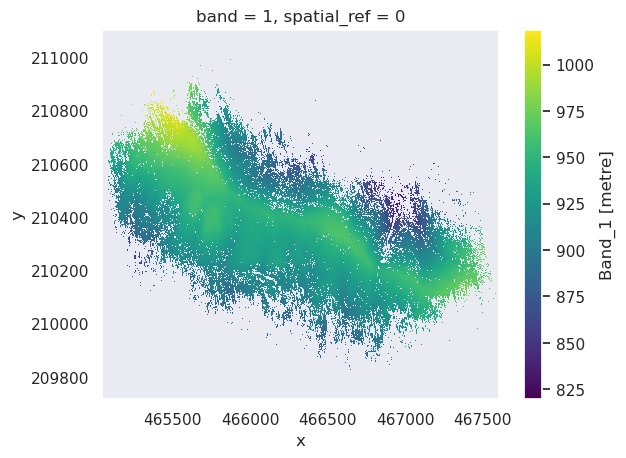

In [10]:
ds.dtm_rapid_set2.plot()

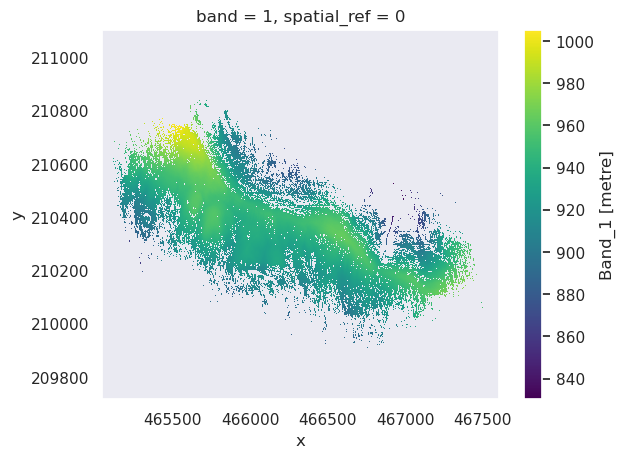

In [11]:
ds.dtm_rapid_set3.plot()

### Calculate snow depth for all of the rapid dtms

In [13]:
ds['hs_rapid_set1'] = ds.dtm_rapid_set1 - ds.dtm_snowoff
ds['hs_rapid_set2'] = ds.dtm_rapid_set2 - ds.dtm_snowoff
ds['hs_rapid_set3'] = ds.dtm_rapid_set3 - ds.dtm_snowoff
ds

<xarray.Dataset>
Dimensions:         (band: 1, x: 2564, y: 1388)
Coordinates:
  * band            (band) int64 1
  * x               (x) float64 4.65e+05 4.65e+05 ... 4.676e+05 4.676e+05
  * y               (y) float64 2.111e+05 2.111e+05 ... 2.097e+05 2.097e+05
    spatial_ref     int64 0
Data variables:
    chm_rapid_set1  (band, y, x) float32 ...
    dtm_snowoff     (band, y, x) float32 1.031e+03 1.031e+03 ... 883.7 883.5
    dsm_snowoff     (band, y, x) float32 1.047e+03 1.049e+03 ... 904.0 905.1
    dtm_ncalm       (band, y, x) float32 3.381e+03 3.382e+03 ... 2.898e+03
    dsm_ncalm       (band, y, x) float32 3.424e+03 3.437e+03 ... 2.963e+03
    dtm_rapid_set1  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    dsm_rapid_set1  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    dtm_rapid_set2  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    dtm_rapid_set3  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    hs_rapid_set1   (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    hs_rapid_set2   (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    hs_rapid_set3   (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan

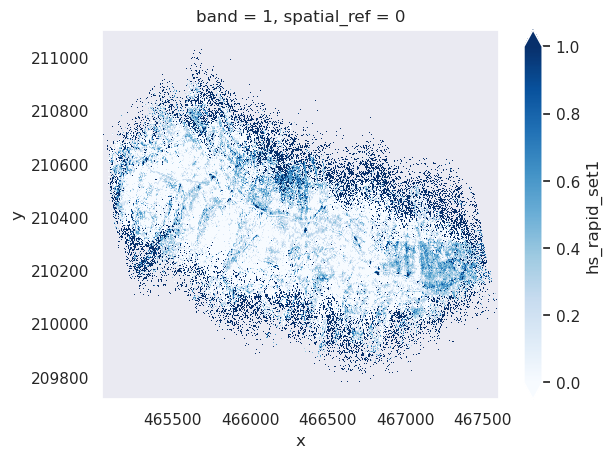

In [16]:
ds.hs_rapid_set1.plot(vmin=0, vmax=1, cmap='Blues')

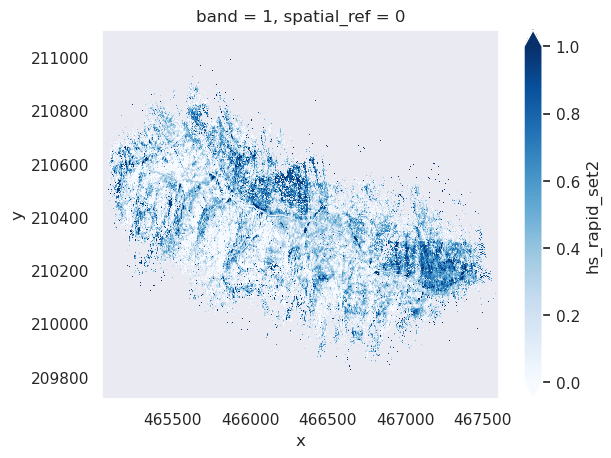

In [17]:
ds.hs_rapid_set2.plot(vmin=0, vmax=1, cmap='Blues')

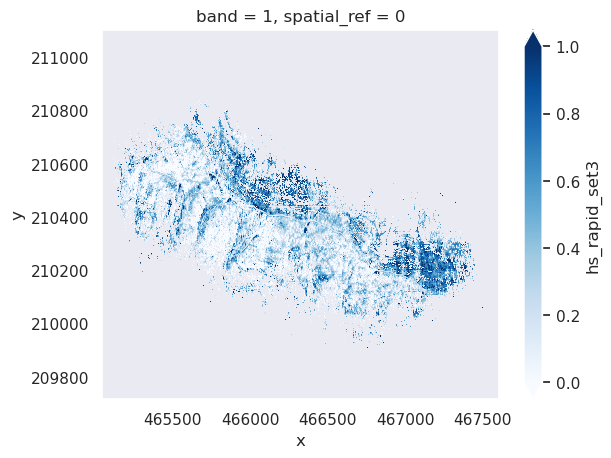

In [18]:
ds.hs_rapid_set3.plot(vmin=0, vmax=1, cmap='Blues')

In [29]:
# first, remove the outliers from the data  

ds['hs_rapid_set1'] = ds['hs_rapid_set1'].where(ds['hs_rapid_set1'] >-5, drop=True) # only keeping snow depth > -10 for now, coming back to this for final cleaning 
ds['hs_rapid_set1'] = ds['hs_rapid_set1'].where(ds['hs_rapid_set1'] < 5, drop=True) # only keeping snow depth < 5 for now... coming back to this

ds['hs_rapid_set2'] = ds['hs_rapid_set2'].where(ds['hs_rapid_set2'] >-5, drop=True) 
ds['hs_rapid_set2'] = ds['hs_rapid_set2'].where(ds['hs_rapid_set2'] < 5, drop=True) 

ds['hs_rapid_set3'] = ds['hs_rapid_set3'].where(ds['hs_rapid_set3'] >-5, drop=True) 
ds['hs_rapid_set3'] = ds['hs_rapid_set3'].where(ds['hs_rapid_set3'] < 5, drop=True) 

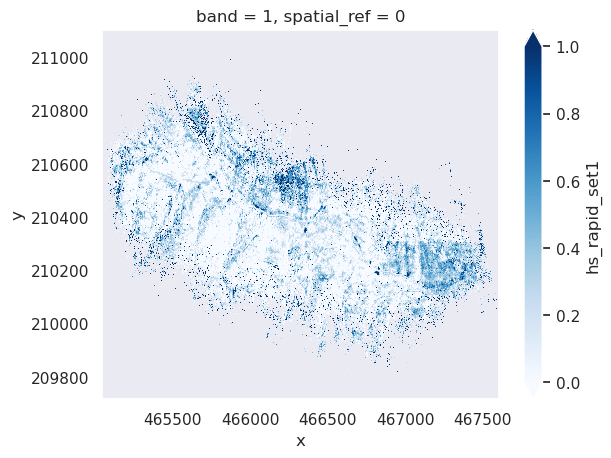

In [28]:
ds.hs_rapid_set1.plot(vmin=0, vmax=1, cmap='Blues')

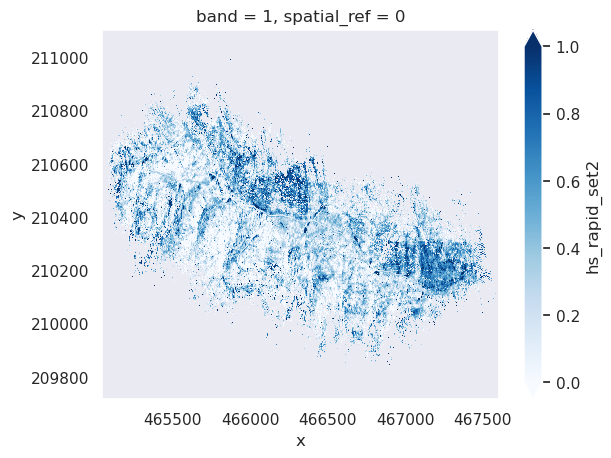

In [30]:
ds.hs_rapid_set2.plot(vmin=0, vmax=1, cmap='Blues')

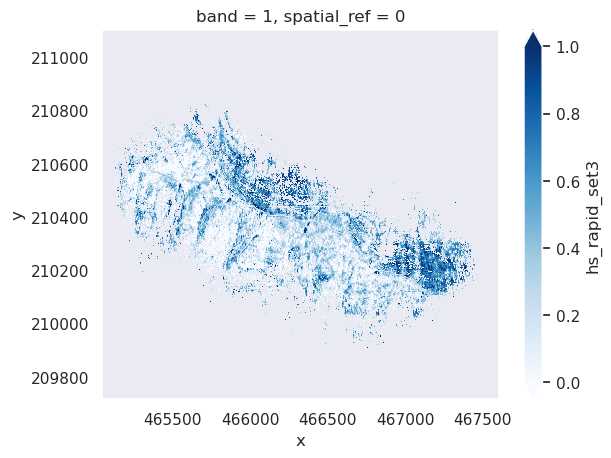

In [31]:
ds.hs_rapid_set3.plot(vmin=0, vmax=1, cmap='Blues')

(-2.0, 2.0)

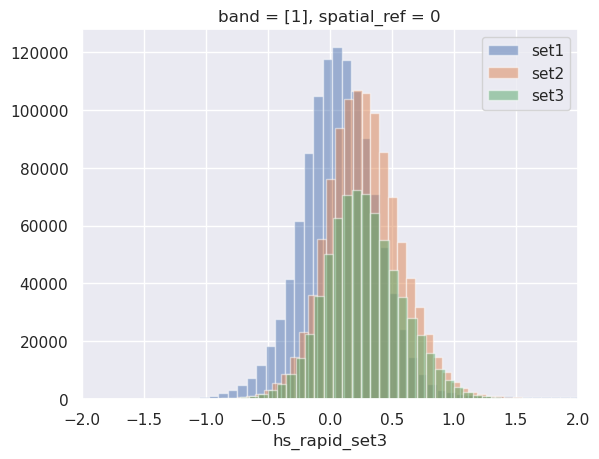

In [35]:
## Create historgrams of all three snow depth datasets together 
ds.hs_rapid_set1.plot.hist(bins=100, alpha=0.5, label='set1')
ds.hs_rapid_set2.plot.hist(bins=100, alpha=0.5, label='set2')
ds.hs_rapid_set3.plot.hist(bins=100, alpha=0.5, label='set3')
plt.legend(loc='upper right')
plt.xlim(-2,2)

## Results
* Set 1: minimum lidar returns only 
* Set 2: using CSF filter for steep slopes in Cloud Compare
* Set 3: using CSF filter for steep slopes in Cloud Compare, and doing noise filters on the point cloud

It seems like set 2 is our best bet for the best snow depth data without reducing the amount of data too much.\
We could see how set 2 and set 3 look when plotting box plots with distance to canopy edge just to be sure.\
Worth saving all the snow depths anyway.

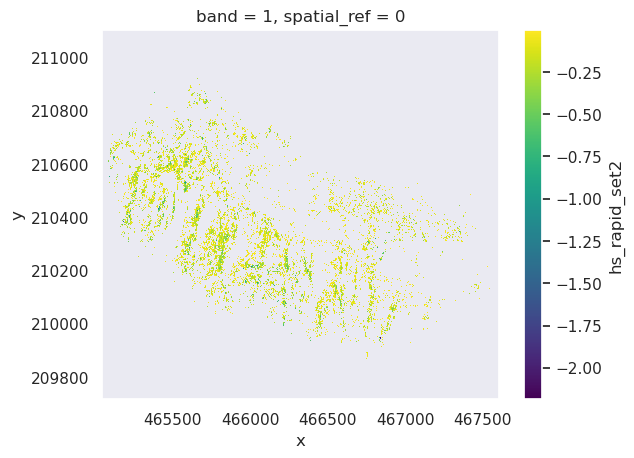

In [37]:
(ds.hs_rapid_set2.where(ds.hs_rapid_set2 < 0)).plot() # looking at the negative values

### Save all the tif files to use later, and clean them up properly since there are some small negative values 

In [39]:
# to save the rasters seperately 
ds['hs_rapid_set1'].rio.to_raster('/storage/lumbraca/RAPID/set1/hs_rapid_set1_python.tif')
ds['hs_rapid_set2'].rio.to_raster('/storage/lumbraca/RAPID/set2/hs_rapid_set2_python.tif')
ds['hs_rapid_set3'].rio.to_raster('/storage/lumbraca/RAPID/set3/hs_rapid_set3_python.tif')

Make the CHM (with snow) while we are here to look at how it compares to the ArcGIS differencing

In [49]:
ds['chmws_rapid'] = ds.dsm_rapid_set1 - ds.dtm_rapid_set1

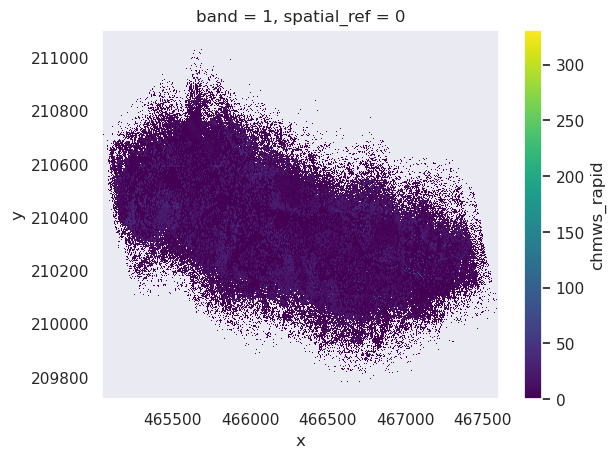

In [50]:
ds.chmws_rapid.plot()

In [51]:
ds['chmws_rapid'] = ds['chmws_rapid'].where(ds['chmws_rapid'] >=0, drop=True) 
ds['chmws_rapid'] = ds['chmws_rapid'].where(ds['chmws_rapid'] < 100, drop=True) 

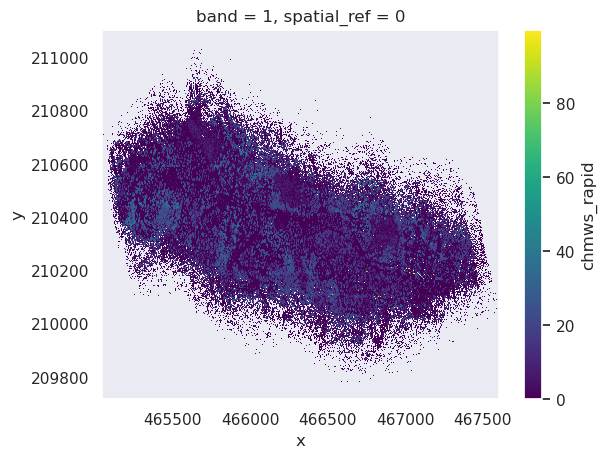

In [52]:
ds.chmws_rapid.plot()

In [53]:
# to save the rasters seperately 
ds['chmws_rapid'].rio.to_raster('/storage/lumbraca/RAPID/chmws_rapid_python.tif')